In [1]:
import matplotlib as mpl
mpl.use('Agg')

from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

import matplotlib.pyplot as plt

import massmapper as mm
import numpy as np
import random
import h5py

%matplotlib inline

In [2]:
masswidth=0.5
n=None
catalog_kind='subhalo'

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree


81113 halos in range. Evaluating all.


100% |########################################################################|


<Figure size 432x288 with 0 Axes>

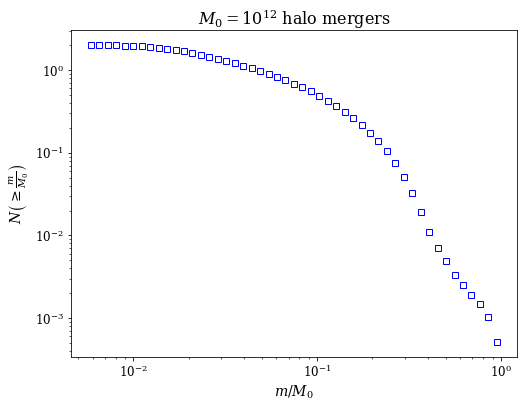

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree


10026 halos in range. Evaluating all.


100% |########################################################################|


<Figure size 432x288 with 0 Axes>

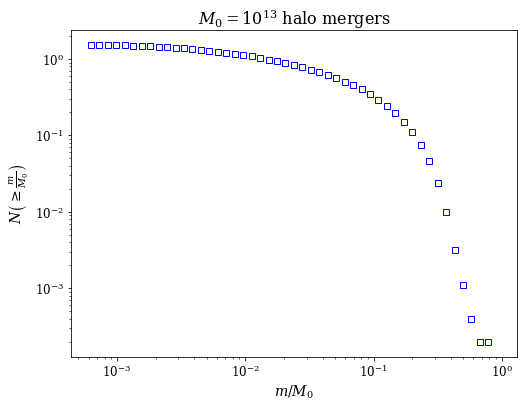

In [3]:
cat12=mm.Mergerdata(12.,masswidth,catalog_kind=catalog_kind,n=n)
cat12.gendistributionnew()
cat13=mm.Mergerdata(13.,masswidth,catalog_kind=catalog_kind,n=n)
cat13.gendistributionnew()

In [4]:
def N_gmratio(cat):
    lowerbound=min(cat.mratios)
    upperbound=max(cat.mratios)
    #print lowerbound
    #print upperbound
    bins=np.logspace(np.log10(lowerbound),np.log10(upperbound),Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)
    N_gmratio=ax.hist(cat.mratios,
              weights=np.repeat(1./len(cat.halis[0]),
                                len(cat.mratios)),
              bins=bins,cumulative=-1)[0]
    ax.set_yscale('log')
    ax.set_xscale('log')
    #N=plt.hist(cat.mratios,bins)[0]
    plt.clf()
    
    return N_gmratio,midbins

def prob_mw(cat):
    lowerbound=min(cat.mratios)
    upperbound=max(cat.mratios)
    bins=np.logspace(np.log10(lowerbound),np.log10(upperbound),Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    N=plt.hist(cat.mratios,bins)[0]
    plt.clf()
    
    binwid=np.average(np.log10(bins[1:]/bins[:-1])) #bin width in dex
    
    P=N/len(cat.mratios)/binwid
    P_mw=P*midbins*10.**cat.mhal0

    return P_mw,midbins

In [5]:
def N_gm(cat):
    lowerbound=min(cat.ms)
    upperbound=max(cat.ms)
    #print lowerbound
    #print upperbound
    bins=np.logspace(np.log10(lowerbound),np.log10(upperbound),Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)
    N=ax.hist(cat.ms,
              weights=np.repeat(1./len(cat.halis[0]),
                                len(cat.mratios)),
              bins=bins,cumulative=-1)[0]
    ax.set_yscale('log')
    #plt.clf()

# Mass-Weighted Probability Density

<Figure size 432x288 with 0 Axes>

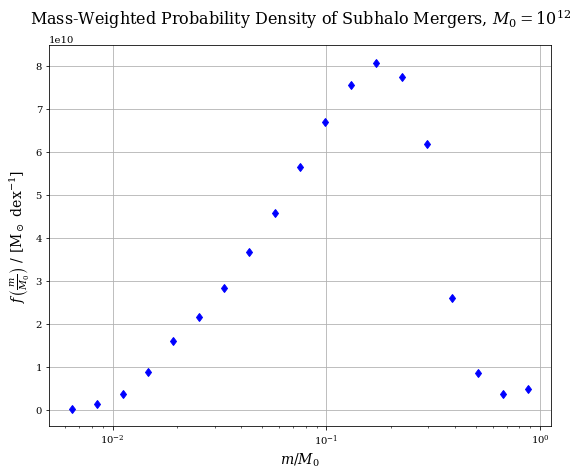

In [6]:
Nbins=20.

P_mw12,midbins12=prob_mw(cat12)
#P_mw13,midbins12=prob_mw(cat13)

fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(1,1,1)

ax.semilogx(midbins12,P_mw12,'db')
#ax.semilogx(midbins13,P_mw13,'dr')
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$f\\left(\\frac{m}{M_0}\\right)$ / [M$_\odot$ dex$^{-1}]$',fontsize=14)
ax.set_title('Mass-Weighted Probability Density of Subhalo Mergers'
             ', $M_0=10^{{{0:0.0f}}}$'
             .format(cat12.mhal0),
             fontsize=16,y=1.04)
ax.grid()
plt.show()

# Assembling $\frac{m}{M_0}$ plots

In [7]:
Nbins=50.

N_gmratio12,midbins12= N_gmratio(cat12)
N_gmratio13,midbins13= N_gmratio(cat13)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [8]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('stewart12m_M0.csv',
                                              delimiter=',',
                                              unpack=True)
midbins_s_13,N_gmratio_s_13=np.loadtxt('stewart13m_M0.csv',
                                              delimiter=',',
                                              unpack=True)

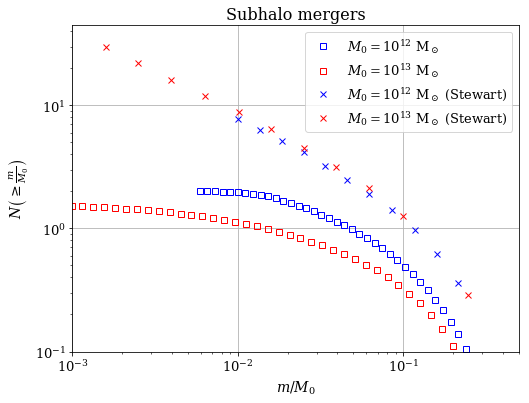

In [9]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_gmratio12,'s',mec='b',mfc='None',label='$M_0=10^{12}$ M$_\odot$')
ax.loglog(midbins13,N_gmratio13,'s',mec='r',mfc='None',label='$M_0=10^{13}$ M$_\odot$')

#'''
ax.loglog(midbins_s_12,N_gmratio_s_12,'x',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$ (Stewart)')
ax.loglog(midbins_s_13,N_gmratio_s_13,'x',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$ (Stewart)')
#'''

#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo mergers',fontsize=16)
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$N\left(\geq\\frac{m}{M_0}\\right)$',fontsize=14)
ax.set_xlim(10.**-3.,10.**-0.3)
ax.set_ylim(10.**-1.,10**1.65)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=13)
ax.grid()

plt.show()

# Testing Chang's code with $M_0=10^{13}$

In [10]:
f= h5py.File('dat/m_M0_13_20181014.h5','r')

print('keys: %s' % f.keys())
a_group_key=list(f.keys())[0]
mratios13raw=list(f[a_group_key])

keys: [u'm_M0']


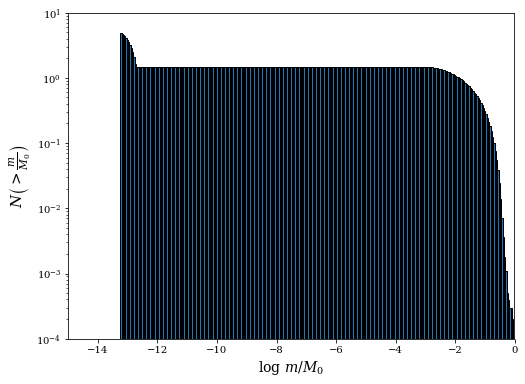

In [23]:
mratios13=np.array(mratios13raw)
#negmratios13=-mratios13
#mratios13=np.minimum(mratios13,mratios13)

loglower=np.min(mratios13)
logupper=np.max(mratios13)
nbins=300
logbins=np.linspace(loglower,logupper,nbins)
midbins_c_13=10.**((logbins[1:]+logbins[:-1])/2.)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
N_gmratios_c_13=ax.hist(mratios13,bins=logbins,
          weights=np.repeat(1./10026.,len(mratios13)),
          cumulative=-1,ec='k')[0]
ax.set_xlim(-15,logupper)
ax.set_ylim(np.min(N_gmratios_c_13),10)
ax.set_xlabel('log $m/M_0$',fontsize=14)
ax.set_ylabel('$N\\left(>\\frac{m}{M_0}\\right)$',fontsize=15)
ax.set_yscale('log')
end=1

# Testing Chang's code with $M_0=10^{12}$

In [13]:
f= h5py.File('dat/m_M0_12_20181014.h5','r')

print('keys: %s' % f.keys())
a_group_key=list(f.keys())[0]
mratios12raw=list(f[a_group_key])

keys: [u'm_M0']


0.0
[5.56394166 5.38172673 5.18267109 4.95633252 4.71005881 4.43721722
 4.14802806 3.82512051 3.47771627 3.10447154]
[-12.24996948 -12.20899968 -12.16802989 -12.12706009 -12.08609029
 -12.04512049 -12.0041507  -11.9631809  -11.9222111  -11.8812413 ]
[-12.24996948 -12.20899968 -12.16802989 -12.12706009 -12.08609029
 -12.04512049 -12.0041507  -11.9631809  -11.9222111  -11.8812413 ]


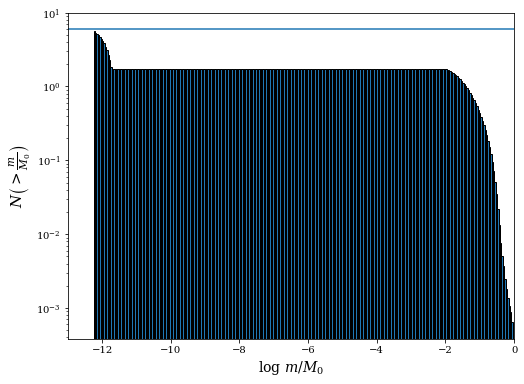

In [22]:
mratios12=np.array(mratios12raw)
#negmratios12=-mratios12
#mratios12=np.minimum(mratios12,mratios12)

loglower=np.min(mratios12)
logupper=np.max(mratios12)
nbins=300
logbins=np.linspace(loglower,logupper,nbins)
midbins_c_12=10.**((logbins[1:]+logbins[:-1])/2.)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
N_gmratios_c_12,binsout12,patches=ax.hist(mratios12,bins=logbins,
          weights=np.repeat(1./81113.,len(mratios12)),
          cumulative=-1,ec='k')
ax.set_xlim(-13,logupper)
ax.set_ylim(np.min(N_gmratios_c_12),1e1)
ax.set_xlabel('log $m/M_0$',fontsize=14)
ax.set_ylabel('$N\\left(>\\frac{m}{M_0}\\right)$',fontsize=15)
ax.set_yscale('log')
ax.axhline(y=6)
print N_gmratios_c_12[:10]
print binsout12[:10]
print logbins[:10]
end=1

# Putting everything on one plot again

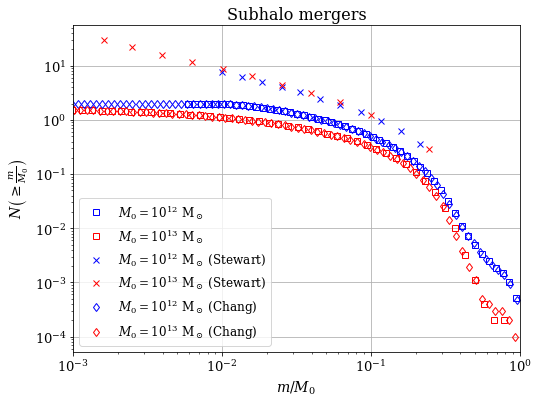

In [15]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_gmratio12,'s',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$')
ax.loglog(midbins13,N_gmratio13,'s',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$')

ax.loglog(midbins_s_12,N_gmratio_s_12,'x',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$ (Stewart)')
ax.loglog(midbins_s_13,N_gmratio_s_13,'x',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$ (Stewart)')

ax.loglog(midbins_c_12,N_gmratios_c_12,'d',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$ (Chang)')
ax.loglog(midbins_c_13,N_gmratios_c_13,'d',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$ (Chang)')


#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo mergers',fontsize=16)
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$N\left(\geq\\frac{m}{M_0}\\right)$',fontsize=14)
ax.set_xlim(10.**-3.,10.**0.)
#ax.set_xlim(10.**-15.,10.**-0.3)
#ax.set_ylim(10.**-1.,10**1.65)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=12)
ax.grid()

plt.show()

# Plotting just mine vs. Stewart's

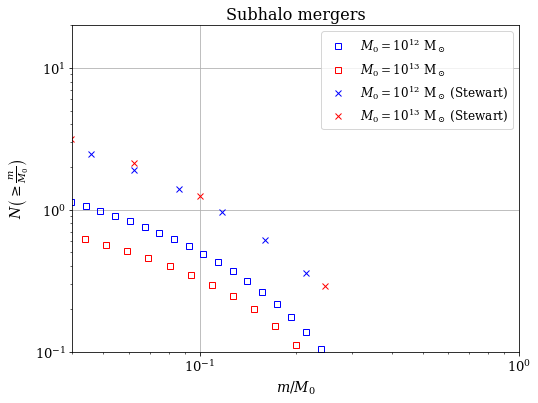

In [29]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_gmratio12,'s',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$')
ax.loglog(midbins13,N_gmratio13,'s',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$')

ax.loglog(midbins_s_12,N_gmratio_s_12,'x',mec='b',mfc='None',
          label='$M_0=10^{12}$ M$_\odot$ (Stewart)')
ax.loglog(midbins_s_13,N_gmratio_s_13,'x',mec='r',mfc='None',
          label='$M_0=10^{13}$ M$_\odot$ (Stewart)')


#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo mergers',fontsize=16)
ax.set_xlabel('$m/M_0$',fontsize=14)
ax.set_ylabel('$N\left(\geq\\frac{m}{M_0}\\right)$',fontsize=14)
ax.set_xlim(10.**-3.,10.**0.)
ax.set_xlim(4e-2,10.**0.)
ax.set_ylim(10.**-1.,10**1.65)
ax.set_ylim(10.**-1.,2e1)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=12)
ax.grid()

plt.show()

keys: [u'm_M0']


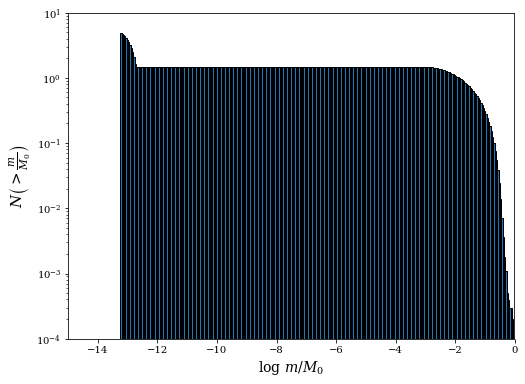

In [17]:
f= h5py.File('dat/m_M0_13_20181015_through.h5','r')

print('keys: %s' % f.keys())
a_group_key=list(f.keys())[0]
mratios13raw=list(f[a_group_key])

mratios13=np.array(mratios13raw)
negmratios13=-mratios13
mratios13=np.minimum(mratios13,mratios13)

loglower=np.min(mratios13)
logupper=np.max(mratios13)
nbins=300
logbins=np.linspace(loglower,logupper,nbins)
midbins_c_13=10.**((logbins[1:]+logbins[:-1])/2.)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
N_gmratios_c_13=ax.hist(mratios13,bins=logbins,
          weights=np.repeat(1./10026.,len(mratios13)),
          cumulative=-1,ec='k')[0]
ax.set_xlim(-15,logupper)
ax.set_ylim(np.min(N_gmratios_c_13),10)
ax.set_xlabel('log $m/M_0$',fontsize=14)
ax.set_ylabel('$N\\left(>\\frac{m}{M_0}\\right)$',fontsize=15)
ax.set_yscale('log')
end=1

[5.56394166 5.38172673 5.18267109 4.95633252 4.71005881 4.43721722
 4.14802806 3.82512051 3.47771627 3.10447154]
[-12.24996948 -12.20899968 -12.16802989 -12.12706009 -12.08609029
 -12.04512049 -12.0041507  -11.9631809  -11.9222111  -11.8812413 ]
[-12.24996948 -12.20899968 -12.16802989 -12.12706009 -12.08609029
 -12.04512049 -12.0041507  -11.9631809  -11.9222111  -11.8812413 ]


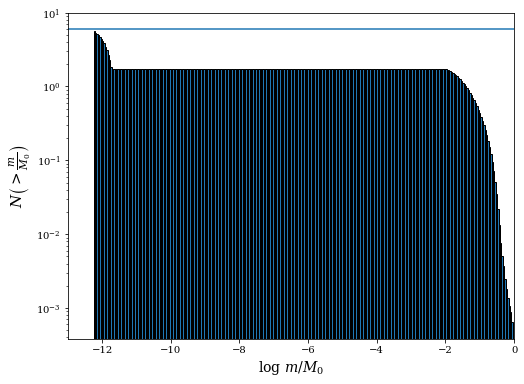

In [18]:
f= h5py.File('dat/m_M0_12_20181015_through.h5','r')
a_group_key=list(f.keys())[0]
mratios12raw=list(f[a_group_key])

mratios12=np.array(mratios12raw)
negmratios12=-mratios12
mratios12=np.minimum(mratios12,mratios12)

loglower=np.min(mratios12)
logupper=np.max(mratios12)
nbins=300
logbins=np.linspace(loglower,logupper,nbins)
midbins_c_12=10.**((logbins[1:]+logbins[:-1])/2.)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
N_gmratios_c_12,binsout12,patches=ax.hist(mratios12,bins=logbins,
          weights=np.repeat(1./81113.,len(mratios12)),
          cumulative=-1,ec='k')
ax.set_xlim(-13,logupper)
ax.set_ylim(np.min(N_gmratios_c_12),1e1)
ax.set_xlabel('log $m/M_0$',fontsize=14)
ax.set_ylabel('$N\\left(>\\frac{m}{M_0}\\right)$',fontsize=15)
ax.set_yscale('log')
ax.axhline(y=6)
print N_gmratios_c_12[:10]
print binsout12[:10]
print logbins[:10]
end=1